Twitch is the world’s leading video platform and community where millions of people and thousands of interests collide in a beautiful explosion of video games, pop culture, and conversation. Its live and on-demand video platform forms the backbone of a distribution network for video game broadcasters including professional players, tournaments, leagues, developers and gaming media organizations.

In this project, We will be working with Twitch’s Science Team to gain insights on user engagement with Twitch video.The video play csv file contains 800,000 rows of user-level streaming data on January 1, 2015. It includes information such as timestamp, game being streamed, device_id, country, and others.

In [105]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
data=pd.read_csv("C:/Users/carol/Desktop/Portfolio/Twitch/video_play.csv")
print(data.head())

                  time                                 device_id  \
0  2015-01-01 18:33:52  40ffc2fa6534cf760becbdbf5311e31ad069e46e   
1  2015-01-01 23:35:33  9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760   
2  2015-01-01 04:39:38  2f9c3f9ee1033b71a3819564243f20ef3bec0183   
3  2015-01-01 11:15:30  0cda8226ba2583424c80c3c1c22c1256b080ad17   
4  2015-01-01 11:28:19  e3288ca5e3153aa85e32f64cdd994b7666968dcf   

                                      login  channel country    player  \
0  085c1eb7b587bfe654f0df7b4ba7f4fc4013636c    frank      US  iphone_t   
1  5ad49a7b408ce452140b180dd6efb57a9f4d22c7   george      US      site   
2  5b9a43e68f019185f55615d0b83019dee4b5d06f    frank      US      site   
3  02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b  estelle      CH      site   
4  b920c228acbcbebee26d9c79f6eb73b73a9480c7    morty      FR      site   

                  game stream_format subscriber  
0    League of Legends           NaN        NaN  
1                 DayZ       chunked      Fals

In [18]:
top10_games=data.groupby('game').login.nunique().reset_index()
top10_gamesv2=top10_games.sort_values(by='login',ascending=False).reset_index()
top10_gamesv3=top10_gamesv2.iloc[:10]
print(top10_gamesv3)

   index                              game  login
0     23                 League of Legends  89544
1     14                            Dota 2  44762
2     10  Counter-Strike: Global Offensive  37114
3     22               Heroes of the Storm  20038
4     11                              DayZ  16513
5     17                 Gaming Talk Shows  15790
6     34     The Binding of Isaac: Rebirth  14495
7      1                           Agar.io   8867
8     20   Hearthstone: Heroes of Warcraft   7400
9     39                    World of Tanks   6821


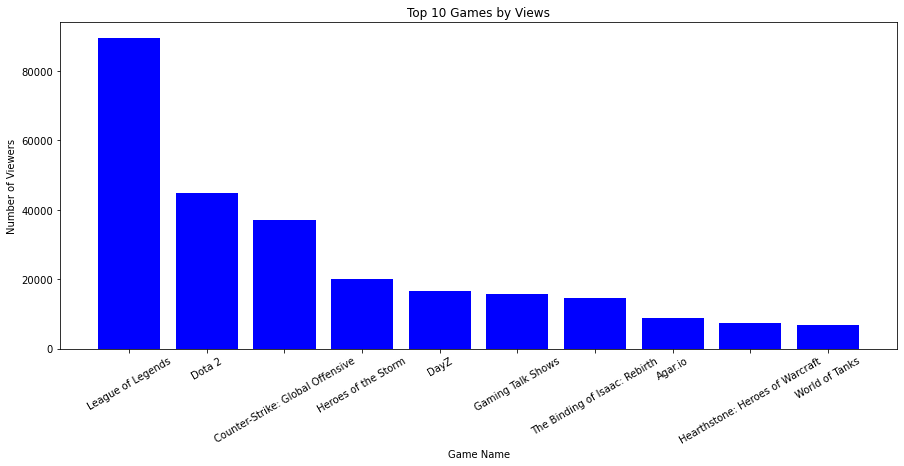

In [31]:
plt.figure(figsize=(15,6))
plt.bar(top10_gamesv3.game, top10_gamesv3.login, color='blue')
plt.xticks(rotation=30)
plt.title('Top 10 Games by Views')
plt.xlabel('Game Name')
plt.ylabel('Number of Viewers')

plt.show()

Here is a list of top 10 most-streamed game on Twitch on January 1, 2015. LoL was the outright #1.

In [52]:
LOL=data[data.game=="League of Legends"]
viewsbyorigin=LOL.groupby('country').login.nunique().reset_index()
viewsbyoriginv2=viewsbyorigin.sort_values(by='login',ascending=False).reset_index()

mylambda= lambda x: x if x=='US' or x=='DE' or x=='CA' or x=='GB' or x=='TR' or x=='SE' or x=='AU' or x=='NL' or x=='PL' or x=='DK' else 'Other' 

viewsbyoriginv2['countryv2']=viewsbyoriginv2.country.apply(mylambda)
print(viewsbyoriginv2.iloc[:12])

viewsbyoriginv3=viewsbyoriginv2.groupby('countryv2').login.sum().reset_index()
print(viewsbyoriginv3)

    index country  login countryv2
0     147      US  34096        US
1      36      DE   5825        DE
2      27      CA   5756        CA
3      51      GB   3276        GB
4     143      TR   2754        TR
5     132      SE   1997        SE
6       9      AU   1811        AU
7     110      NL   1730        NL
8     119      PL   1700        PL
9      37      DK   1604        DK
10    145      TW   1540     Other
11     58      GR   1495     Other
   countryv2  login
0         AU   1811
1         CA   5756
2         DE   5825
3         DK   1604
4         GB   3276
5         NL   1730
6      Other  25951
7         PL   1700
8         SE   1997
9         TR   2754
10        US  34096


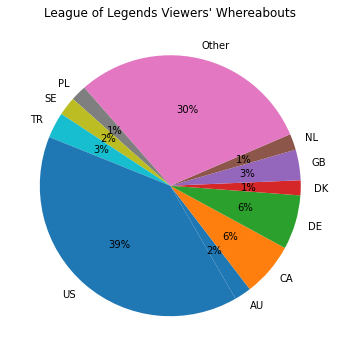

In [79]:
plt.figure(figsize=(6,6))
plt.pie(viewsbyoriginv3.login,labels=viewsbyoriginv3.countryv2, startangle=300, autopct='%d%%')
plt.title("League of Legends Viewers' Whereabouts")
plt.show()

Narrowing down to just LOL, nearly 40% of the views originated from the US, followed by 6% from Germany and 6% from Canada. Overall, half of the views were international, showing that the popularity of LOL travelled aross borders.

In [114]:
LOL['Hour'] = pd.to_datetime(LOL['time']).dt.hour

viewsbyhour=LOL.groupby('Hour').login.count().reset_index()
print(viewsbyhour)

    Hour  login
0      0  14016
1      1  11106
2      2  18306
3      3  14987
4      4  13903
5      5   5118
6      6    298
7      7    316
8      8    282
9      9    286
10    10    259
11    11    315
12    12    340
13    13    310
14    14    322
15    15   7407
16    16  14062
17    17  14174
18    18  12080
19    19  10837
20    20  13192
21    21  19506
22    22  11723
23    23  10388


C:\Users\carol\miniconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


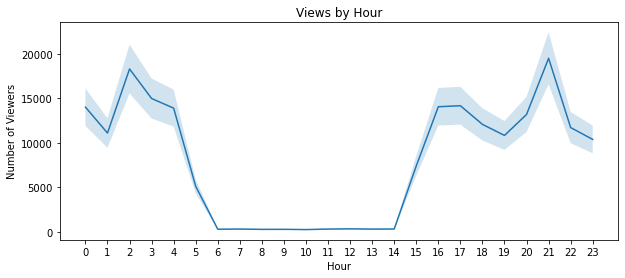

In [118]:
plt.figure(figsize=(10,4))
plt.plot(viewsbyhour.Hour, viewsbyhour.login)
plt.title("Views by Hour")
plt.xlabel ("Hour")
plt.ylabel ("Number of Viewers")
plt.xticks(viewsbyhour.Hour)

y_upper=[i*1.15 for i in viewsbyhour.login]
y_lower=[i*0.85 for i in viewsbyhour.login]
plt.fill_between(viewsbyhour.Hour, y_lower, y_upper, alpha=0.2)

plt.show()

In terms of LOL streams by hours, users preferred to watch the game at 9pm or 2am, as shown in the line graph above. 